In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [302]:
athlete_events = "athlete_events.csv"

athlete_data = pd.read_csv(athlete_events)

## Evaluate Data

In [303]:
athlete_data.count()

ID        271116
Name      271116
Sex       271116
Age       261642
Height    210945
Weight    208241
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal      39783
dtype: int64

In [304]:
athlete_data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [305]:
athlete_data["Season"].value_counts()

Summer    222552
Winter     48564
Name: Season, dtype: int64

## Clean Data

In [306]:
athlete_data = athlete_data.rename({'NOC': 'Country'}, axis=1)

In [307]:
# Create dataframe to store Medal Data
medal_df = x

In [308]:
x.count()

ID         39783
Name       39783
Sex        39783
Age        39051
Height     31072
Weight     30456
Team       39783
Country    39783
Games      39783
Year       39783
Season     39783
City       39783
Sport      39783
Event      39783
Medal      39783
dtype: int64

## Questions and Plot

In [309]:
# Sorting data by year from 1896 to 2016
dataByYear= medal_df.sort_values("Year")
dataByYear.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
23916,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold


In [310]:
# Winter Olympic Data
data_winter = dataByYear[dataByYear.Season == "Winter"]
data_winter.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
255566,127948,Karl Edvard Wahlberg,M,49.0,NaN,NaN,Sweden,SWE,1924 Winter,1924,Winter,Chamonix,Curling,Curling Men's Curling,Silver


In [311]:
# Get Gender Count by Summer
sex_cnt_winter = data_winter.groupby(['Year','Sex','Season']).size().reset_index(name='Count')
sex_cnt_winter.head(1)

,Year,Sex,Season,Count
0,1924,F,Winter,6


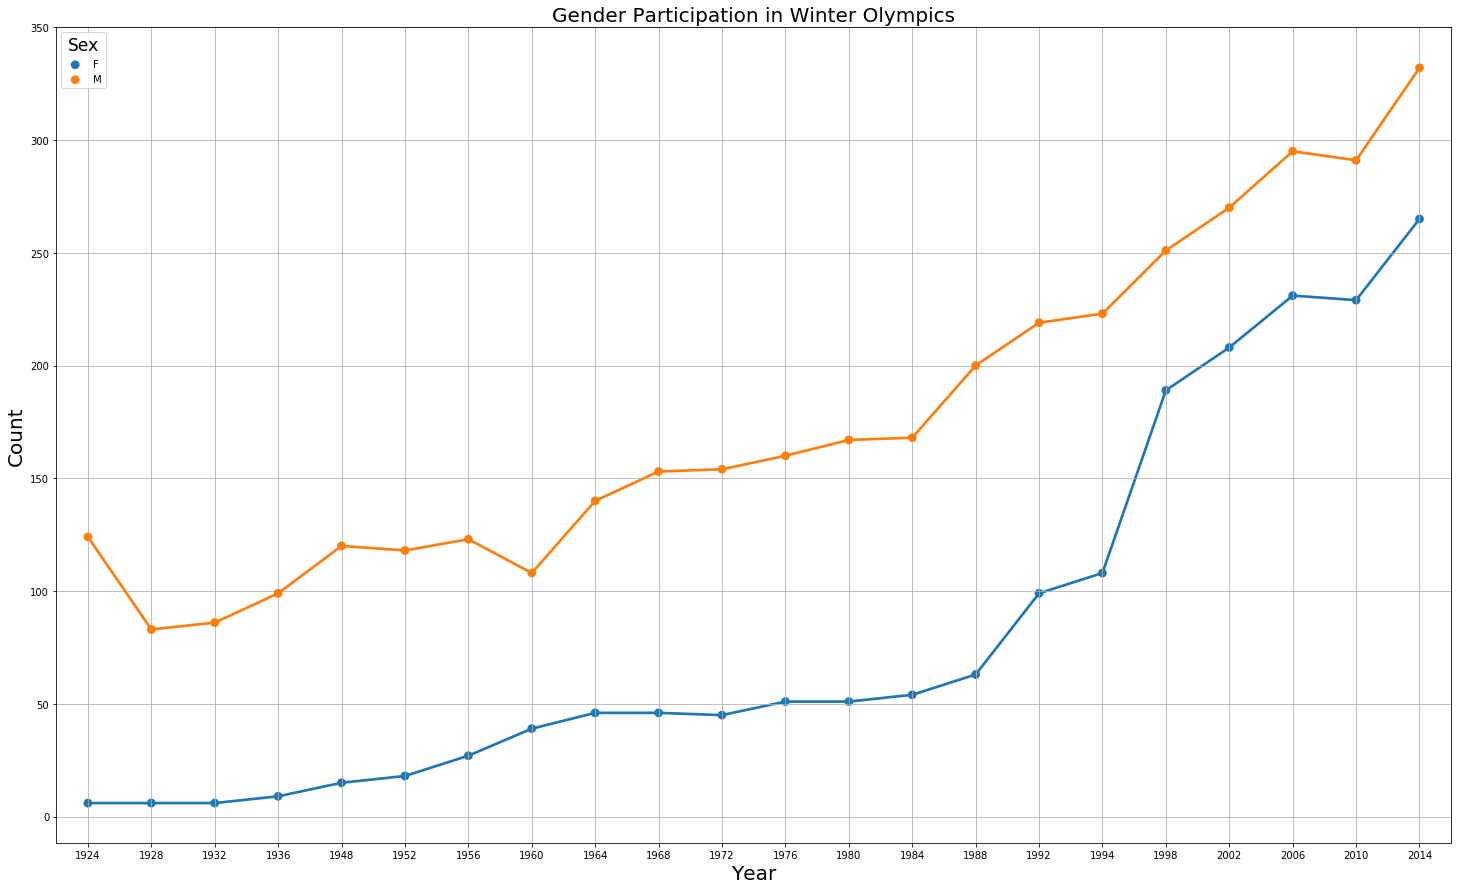

In [312]:
# Plot Time Series using Seaborn
plt.rcParams["axes.labelsize"] = 20
f, ax_s= plt.subplots(figsize=(25,15))
#sns.set_context("notebook", font_scale=0.5, rc={"font.size":8,"axes.labelsize":5})

ax_s.set_title("Gender Participation in Winter Olympics",fontsize=20)

sns.pointplot(x="Year", y="Count", hue="Sex", data=sex_cnt_winter, ax= ax_s)
plt.grid(True)
plt.show()

In [313]:
# Winter Olympic Data
data_summer = dataByYear[dataByYear.Season == "Summer"]
data_summer.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal
23916,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold


In [314]:
# Get Gender Count by Summer
sex_cnt_summer = data_summer.groupby(['Year','Sex','Season']).size().reset_index(name='Count')
sex_cnt_summer.head(1)

,Year,Sex,Season,Count
0,1896,M,Summer,143


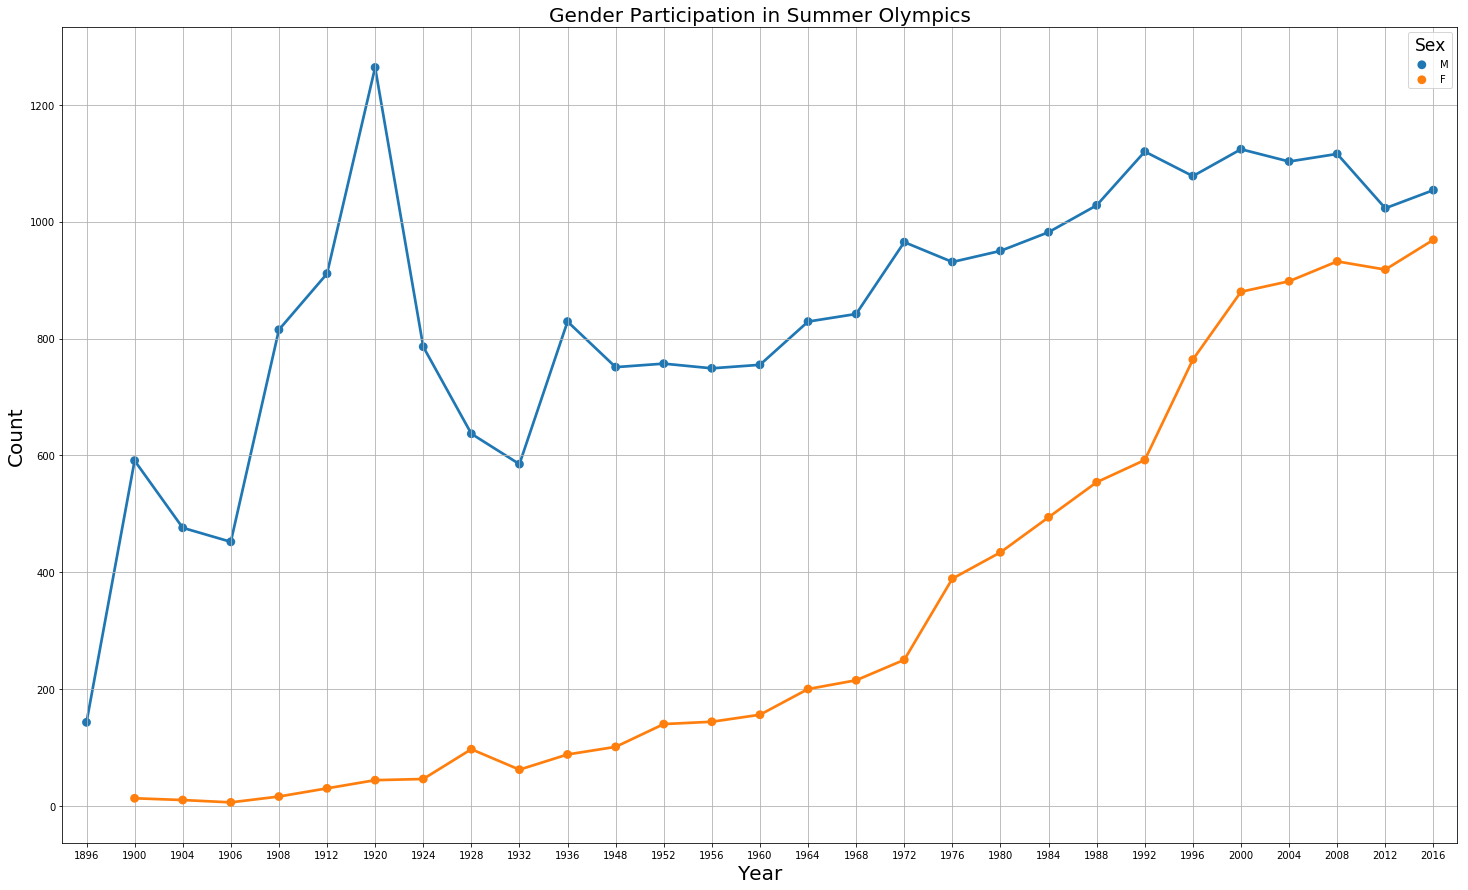

In [315]:
# Plot Time Series using Seaborn
plt.rcParams["axes.labelsize"] = 20
f, ax_s= plt.subplots(figsize=(25,15))
#sns.set_context("notebook", font_scale=0.5, rc={"font.size":8,"axes.labelsize":5})

ax_s.set_title("Gender Participation in Summer Olympics",fontsize=20)

sns.pointplot(x="Year", y="Count", hue="Sex", data=sex_cnt_summer, ax= ax_s)
plt.grid(True)
plt.show()

In [316]:
# Sort Medals Count by Top 10 Countries 
medal_cnt.sort_values("Count", axis = 0, ascending = False, 
                 inplace = True, na_position ='last')  

#display count
medal_cnt.head(10)

,Team,Count
462,United States,5219
403,Soviet Union,2451
165,Germany,1984
171,Great Britain,1673
149,France,1550
215,Italy,1527
420,Sweden,1434
18,Australia,1306
67,Canada,1243
198,Hungary,1127


In [327]:
# Winter Olympic Data
top_medals = medal_cnt[medal_cnt.Count >= 1127]

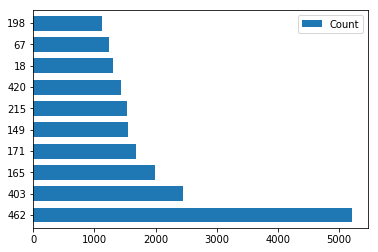

In [328]:
# Plotting with Horizontal View
top_medals.plot.barh(width=.7)

plt.show()

In [331]:
data2 = athlete_data.dropna(subset=['Medal'])

In [332]:
# Gold Medal Winners since 1896
gold_winners= data2[data2["Medal"]=="Gold"]
# Silver Medal Winners since 1896
silver_winners= data2[data2["Medal"]=="Silver"]
# Bronze Medal Winners since 1896
bronze_winners= data2[data2["Medal"]=="Bronze"]

In [335]:
# Save top 10 medal winners by country
gwa = gold_winners['Team'].value_counts().sort_values(ascending=True)[-10:]
swa = silver_winners['Team'].value_counts().sort_values(ascending=True)[-10:]
bwa = bronze_winners['Team'].value_counts().sort_values(ascending=True)[-10:]

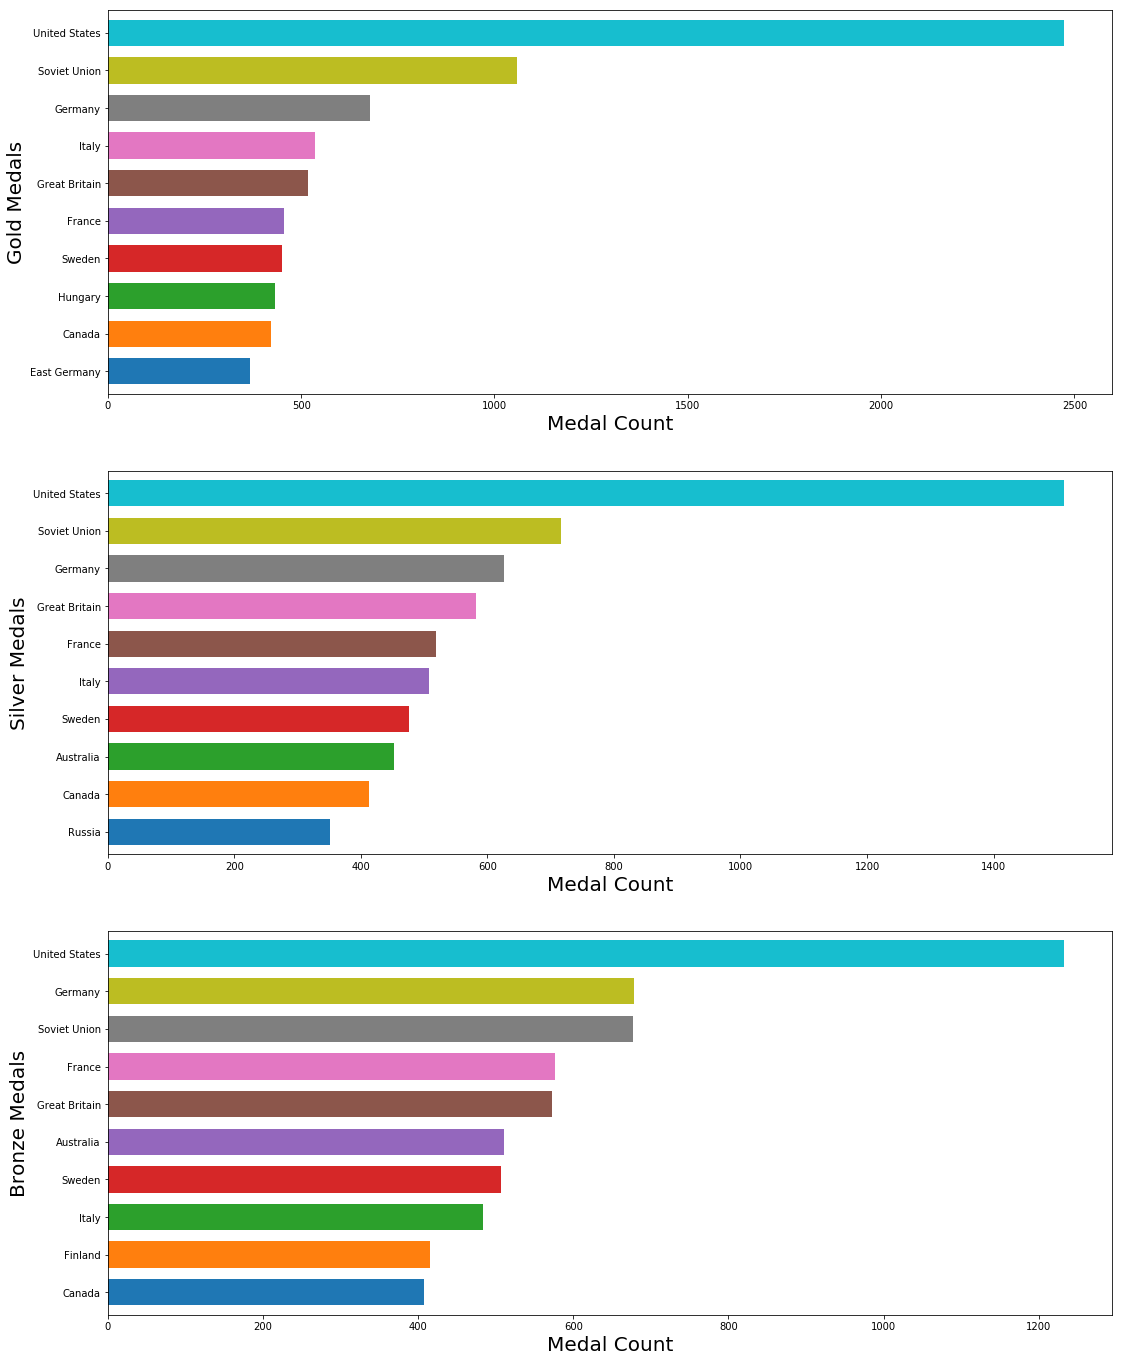

In [352]:
# Plotting with Horizontal View
plt.subplots(figsize=(18,24))
ax1 = plt.subplot(311)
gwa.plot.barh(width=.7)
ax2 = plt.subplot(312)
swa.plot.barh(width=.7)
ax3 = plt.subplot(313)
bwa.plot.barh(width=.7)

ax1.set_xlabel('Medal Count')
ax2.set_xlabel('Medal Count')
ax3.set_xlabel('Medal Count')
ax1.set_ylabel('Gold Medals')
ax2.set_ylabel('Silver Medals')
ax3.set_ylabel('Bronze Medals')
plt.show()